# Universidade de Caxias do Sul
# Área de Ciências Exatas e Engenharias
# Aprendizado de Máquina II - Aprendizado Supervisionado

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  

In [2]:
from google.colab import files
arquivo = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [3]:
# Carga do dataset
#zoo = pd.read_csv('/content/drive/My Drive/_Aprendiz_Máquina/zoo.csv')
cancer = pd.read_csv('breast-cancer.csv',',')
cancer.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Nova seção

In [4]:
cancer['diagnosis']=cancer['diagnosis'].replace({'M': 1,'B': 0}) # Maligno 1 e Benigno 0

In [5]:
# X deve armazenar as características e y o atributo target 

X = cancer.iloc[:, 2:-1].values  
print(X)
y = cancer['diagnosis'].values  
print(X.shape)
print(y)

[[ 17.99    10.38   122.8    ...   0.7119   0.2654   0.4601]
 [ 20.57    17.77   132.9    ...   0.2416   0.186    0.275 ]
 [ 19.69    21.25   130.     ...   0.4504   0.243    0.3613]
 ...
 [ 16.6     28.08   108.3    ...   0.3403   0.1418   0.2218]
 [ 20.6     29.33   140.1    ...   0.9387   0.265    0.4087]
 [  7.76    24.54    47.92   ...   0.       0.       0.2871]]
(569, 29)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0

In [6]:
# cria os conjuntos de treino e de teste - 30% para teste de forma randômica
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(398, 29) (398,)
(171, 29) (171,)


In [7]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  0   1]
 [255 143]]


In [8]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  0   1]
 [102  69]]


# Execução do método kNN

In [9]:
neigh = KNeighborsClassifier(n_neighbors=3,weights='distance')
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
   
def model_rf(criterion,max_depth, n_estimators):
    model = RandomForestClassifier(criterion = criterion, max_depth = max_depth, n_estimators = n_estimators)
    return model

def model_to_predict(model,dfx,dfy,cv_layers):
    predictions = cross_val_predict(model, dfx, dfy, cv=cv_layers)
    return predictions

def accuracy(dfy, predictions):
    score = accuracy_score(dfy,predictions)*100
    return score

In [11]:
rf_model = model_rf('gini', 80, 100)
pred_rf = model_to_predict(rf_model,X_train,y_train,10)
print('RF: {}'.format(accuracy(y_train,pred_rf)))

RF: 95.47738693467338


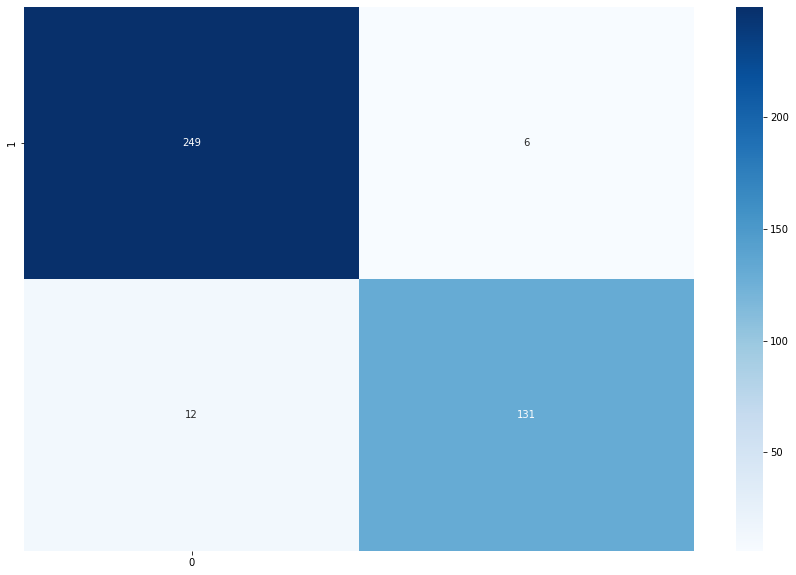

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

def model_confusion_matrix(dfy,predictions):
    cf = confusion_matrix(dfy, predictions)
    return cf

cf_rf = model_confusion_matrix(y_train,pred_rf)

def plot_confusion_matrix(cf):
    lbl1 = [0]
    lbl2 = [1]
    plt.figure(figsize=(15, 10))
    sns.heatmap(cf, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
    plt.show()

plot_confusion_matrix(cf_rf)

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y_train, pred_rf))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       255
           1       0.96      0.92      0.94       143

    accuracy                           0.96       398
   macro avg       0.96      0.95      0.95       398
weighted avg       0.96      0.96      0.96       398

